# Regression

### Import necessary libraries and dataset

In [1]:
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=10,
                       noise=1, random_state=42)

We first import the necessary libraries such as `Scikit-learn`, `Numpy` and `Matplotlib.` We also generated a synthetic dataset from the Scikit-learn dataset library, which is a regression dataset with 500 instances and 10 attributes. We then separate the independent variable X and dependent variable y from the dataset.

Carry out any preprocessing on the dataset

Before proceeding with any regression algorithm, it is always recommended to perform preprocessing steps such as feature scaling, imputation, etc. Here, we will apply StandardScaler to standardize the data.

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Split the dataset into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In this step, we split the dataset into training and testing sets. We keep `70%` of the dataset for training and `30%` for testing. We also set a random seed for reproducibility.

### Implement a Linear Regression Algorithm

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LinearR = LinearRegression()
LinearR.fit(X_train, y_train)
y_pred = LinearR.predict(X_test)

Here, we import the Perceptron algorithm from Scikit-learn's linear_model library. We then instantiate the perceptron object and fit it to our training data. We use the trained model to predict the target variable on the test data.

### Evaluate the performance of the regression problem

In [6]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

Mean Squared Error:  0.9052902177417578


In this step, we calculate the mean squared error between the predicted values and actual values. This will give us an idea of how well our model is performing.

### Plot the residual

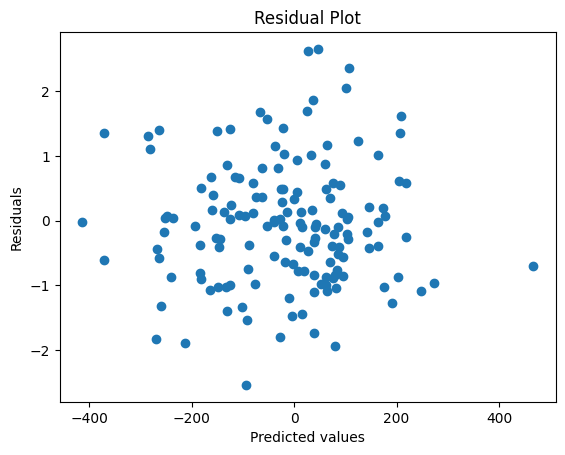

In [7]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

Finally, we plot the residual between the predicted and actual values to visualize the errors in our model. A good model will have residuals randomly scattered around zero.

Overall, this code implements a perceptron algorithm for the Boston dataset, evaluates its performance using mean squared error and plots the residual to visualize the errors. Other regression algorithms such as decision tree regression or random forest regression can also be used.

# Neural Network (Regression)

In [8]:
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

Data Preprocessing - apply StandardScaler to standardize the data.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Split the dataset into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)


In this step, we split the dataset into training and testing sets. We keep 70% of the dataset for training and 30% for testing. We also set a random seed for reproducibility.



### Implement a neural network model with 2 hidden layers using Keras

In [11]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), epochs=100,
                    batch_size=32, verbose=0)


Here, define a sequential neural network model using Keras. We add 2 dense layers with 64 neurons each and use the rectified linear unit (ReLU) activation function. We also add a final dense layer with a single neuron for output. We compile the model using the Adam optimizer and mean squared error (MSE) loss function.

We then fit the model on the training data for 100 epochs with a batch size of 32. We also evaluate the model on the testing data using the validation_data parameter.



### Evaluate the performance of the regression problem

In [12]:
mse_train = model.evaluate(X_train, y_train, verbose=0)
mse_test = model.evaluate(X_test, y_test, verbose=0)
print("Training Mean Squared Error: ", mse_train)
print("Testing Mean Squared Error: ", mse_test)

Training Mean Squared Error:  41.02366256713867
Testing Mean Squared Error:  64.74259185791016


In this step, we calculate the mean squared error between the predicted values and actual values for both training and testing sets. This will give us an idea of how well our model is performing.

2) Implement a neural network model with 2 hidden layers using Keras (activation function: Leaky ReLU)

In [13]:

# import the LeakyReLU module and create a LeakyReLU instance
from keras.layers import LeakyReLU
leaky_relu = LeakyReLU(alpha=0.01)

In [14]:
model = Sequential()
model.add(Dense(64, activation='leaky_relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), epochs=100,
                    batch_size=32, verbose=0)

Here, I define a sequential neural network model with 2 hidden layers as opposed to the previous model. The hidden layers consist of 64 neurons each and each of the layers uses the Leaky rectified linear unit (Leaky ReLU) activation function. There is also a final dense layer with a single neuron for output. The model is compiled using the Adam optimizer and mean squared error (MSE) loss function.

Evaluate the performance of the regression problem

In [16]:
mse_train = model.evaluate(X_train, y_train, verbose=0)
mse_test = model.evaluate(X_test, y_test, verbose=0)
print("Training Mean Squared Error: ", mse_train)
print("Testing Mean Squared Error: ", mse_test)

Training Mean Squared Error:  20.62482452392578
Testing Mean Squared Error:  37.77157974243164


The model's performance experienced a slight reduction after decreasing the number of hidden layers and switching to the LeakyReLU activation function. This outcome is somewhat unexpected as the LeakyReLU function is typically anticipated to outperform the regular ReLU function employed in the previous model. Nevertheless, considering that the reduction in performance coincided with the reduction in the number of hidden layers, it is reasonable to attribute this outcome to the decrease in the model's complexity.

The next implementation uses the same activation function (LeakyReLU) but adds an additional hidden layer. We shall observe if the LeakyReLU's performance increases with an increase in the number of hidden layers.

3) Implement a neural network model with 3 hidden layers using Keras (activation function: Leaky ReLU)

In [17]:
leaky_relu = LeakyReLU(alpha=0.02)

In [18]:
model = Sequential()
model.add(Dense(128, activation='leaky_relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), epochs=100,
                    batch_size=32, verbose=0)

In this code snippet, I create a sequential neural network model with 3 hidden layers, which differs from the previous model. The hidden layers are composed of 128, 64, and 32 neurons, respectively, and each of them utilizes the Leaky rectified linear unit (Leaky ReLU) activation function. Additionally, there is a final dense layer with a single neuron responsible for the output. To prepare the model for training, I compile it using the Adam optimizer and apply the mean squared error (MSE) loss function.

Evaluate the performance of the regression problem

In [19]:
mse_train = model.evaluate(X_train, y_train, verbose=0)
mse_test = model.evaluate(X_test, y_test, verbose=0)
print("Training Mean Squared Error: ", mse_train)
print("Testing Mean Squared Error: ", mse_test)

Training Mean Squared Error:  3.8120782375335693
Testing Mean Squared Error:  10.762750625610352


The results above confirm the fact that the more hidden layers, the better the performance of the model. We can see that the testing MSE shows a drastic reduction from 42.68 to 11.264, after the addition of just one hidden layer consisting of 32 neurons.

# Classification Problems

### Import necessary libraries and dataset

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [21]:
iris = load_iris()
X = iris.data
y = iris.target

In this step, we first import the necessary libraries such as Scikit-learn, Keras, Numpy and Matplotlib. We also load the Iris dataset from the Scikit-learn dataset library, which is a classification dataset with 150 instances and 4 attributes. We then separate the independent variable X and dependent variable y from the dataset.

### Data Preprocessing - apply StandardScaler to standardize the data and convert the target variable to categorical format.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = to_categorical(y)

### Split the dataset into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In this step, we split the dataset into training and testing sets. We keep 70% of the dataset for training and 30% for testing. We also set a random seed for reproducibility.

### Implement a neural network model with 3 hidden layers using Keras

In [25]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=1000, batch_size=32)

Epoch 1/1000
4/4 [==============================] - 1s 77ms/step - loss: 1.0711 - accuracy: 0.3524 - val_loss: 1.0422 - val_accuracy: 0.2889
Epoch 2/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.9960 - accuracy: 0.3524 - val_loss: 0.9730 - val_accuracy: 0.2889
Epoch 3/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.9382 - accuracy: 0.3524 - val_loss: 0.9206 - val_accuracy: 0.3111
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.8900 - accuracy: 0.4476 - val_loss: 0.8725 - val_accuracy: 0.5333
Epoch 5/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.8444 - accuracy: 0.6857 - val_loss: 0.8259 - val_accuracy: 0.8222
Epoch 6/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.8021 - accuracy: 0.8000 - val_loss: 0.7811 - val_accuracy: 0.8444
Epoch 7/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.7585 - accuracy: 0.8190 - val_loss: 0.7366 - val_accuracy: 0.8444
Epoch 8/1000


Here, we define a sequential neural network model using Keras. We add 3 dense layers with 64, 32, and 16 neurons each, respectively, and use the rectified linear unit (ReLU) activation function. We also add a final dense layer with 3 neurons for output using the softmax activation function. We compile the model using the Adam optimizer and categorical cross-entropy loss function.

We then fit the model on the training data for 100 epochs with a batch size of 32. We also evaluate the model on the testing data using the validation_data parameter and accuracy as a metric.

### Compute and plot the confusion matrix

2/2 [==============================] - 0s 6ms/step


Text(50.722222222222214, 0.5, 'True labels')

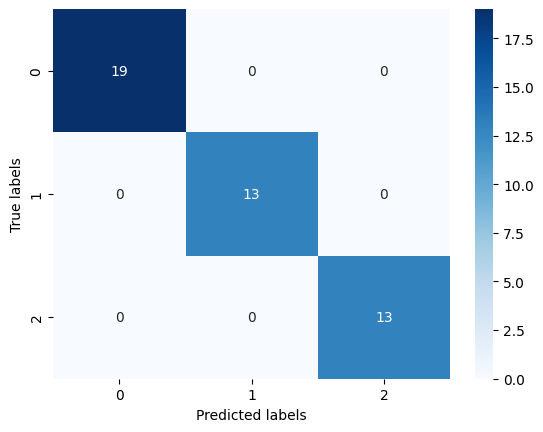

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

### Plot the residual, training and testing error

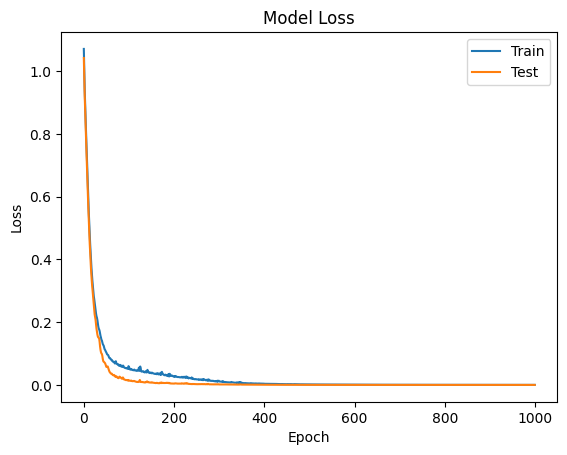

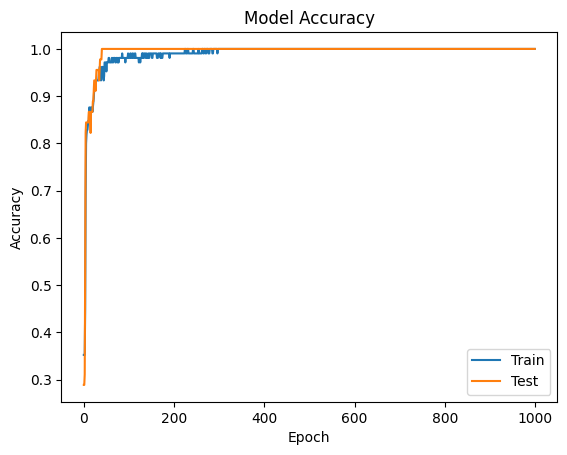

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [28]:
# Evaluate the model on the training and testing data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss: ", train_loss)
print("Training Accuracy: ", train_accuracy)
print("Testing Loss: ", test_loss)
print("Testing Accuracy: ", test_accuracy)

Training Loss:  0.00013823156768921763
Training Accuracy:  1.0
Testing Loss:  3.404644667170942e-05
Testing Accuracy:  1.0



Based on the observed loss and accuracy metrics, it is evident that the model achieves a remarkably high accuracy as it progresses towards 100 epochs and beyond. By the end of the 1000th epoch, the model achieves 100% accuracy when making predictions on the test data. It is worth noting that the accuracy metrics do not significantly differ from the results obtained from the previous model.

However, when comparing the training and testing loss, the model employing the sigmoid activation function yields slightly higher values than the model using the Tanh activation function. Additionally, while the sigmoid model consists of 3 hidden layers, the Tanh model only comprises 2 hidden layers.

From these observations, we can conclude that the Tanh activation function performs better than the sigmoid activation function for multi-class classification problems.